# The Sparks Foundation - Data Science & Business Analytics Internship

## Task2 - Prediction using Unsupervised ML

From the given Iris dataset, predicting the optimum number of clusters and representing it virtually

## Author: Yogeshwari A

In [ ]:
# importing the required libraries

import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading data from a csv file

iris_df = pd.read_csv('Iris.csv', index_col='Id')
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Basic Data Exploration

In [ ]:
iris_df.shape

(150, 5)

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
# checking for null values

iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### PairPlot
It plots multiple pairwise bivariate distributions in a dataset. 

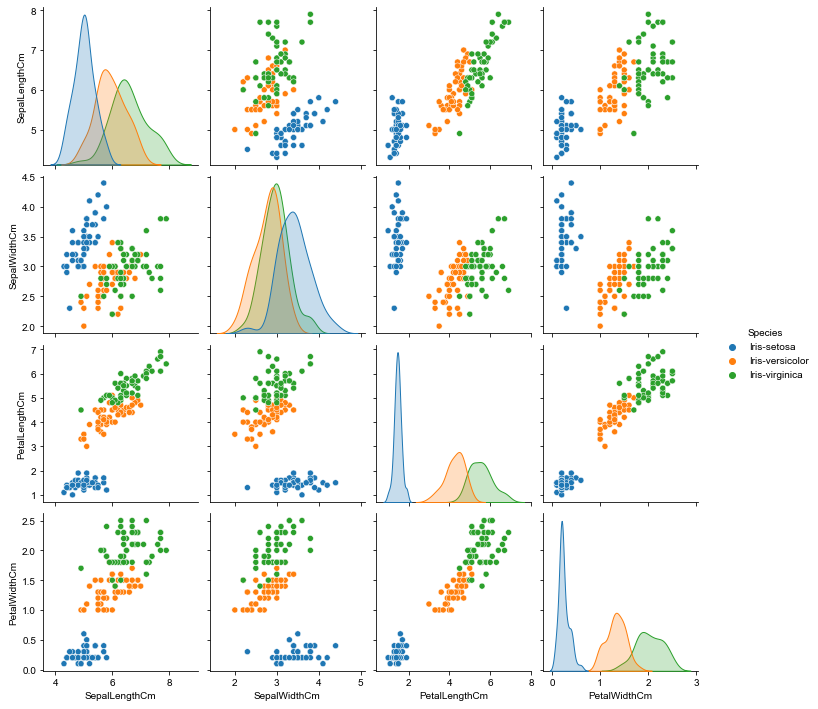

In [ ]:
sns.pairplot(iris_df, hue='Species')
sns.set_style('darkgrid')

### Finding the correlation 

In [ ]:
iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

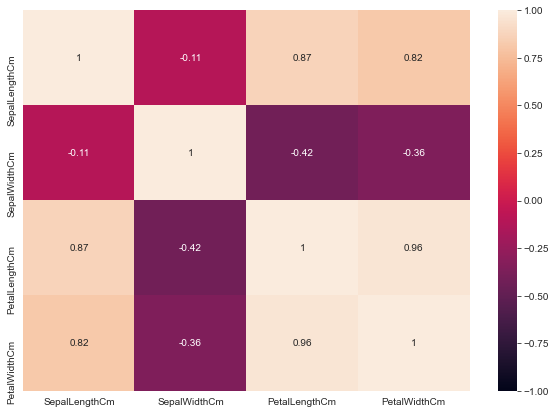

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(iris_df.corr(), annot=True, vmin=-1, vmax=1)

### Elbow Plot - Finding the optimum number of clusters

In [ ]:
# Removing the categorical column from the dataset

df = iris_df.iloc[:, :-1].values

# Just looking at the top 5 rows of the dataset
df[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Finding the Sum of Square Error

In [ ]:
# Let's find Sum of Square Error by changing the number of clusters

k_range = range(1,11)
sse = []
for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(df)
    sse.append(km.inertia_)

In [ ]:
sse

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 35.04275995246584,
 30.085307692307698,
 27.765424470266584,
 26.06375006366183]

### Plotting the SSE

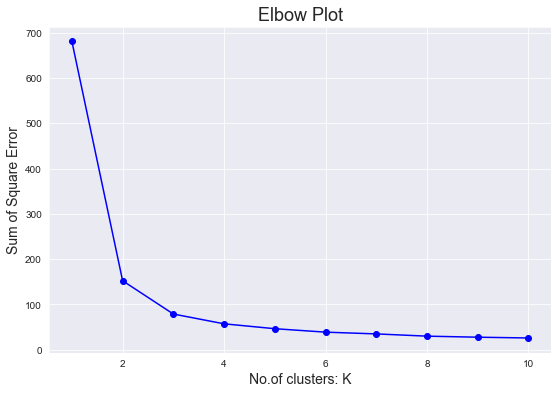

In [ ]:
# Now let's plot the SSE, to find the optimum number of clusters present.

plt.figure(figsize=(9,6))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('No.of clusters: K', fontsize=14)
plt.ylabel('Sum of Square Error', fontsize=14)
plt.title('Elbow Plot', fontsize=18)
plt.show()


"The Elbow method" got its name from the elbow pattern forming something like above. The optimal clusters are formed where the elbow occurs.

### In this scenario, the optimum number of clusters are **'3'**.

### Creating K-Means Classifier

In [ ]:
# Applying kmeans to the dataset 
# Creating the kmeans classifier

km = KMeans(n_clusters=3, init = 'k-means++')
y_kmeans = km.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [ ]:
iris_df['Cluster'] = y_kmeans
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,2
147,6.3,2.5,5.0,1.9,Iris-virginica,0
148,6.5,3.0,5.2,2.0,Iris-virginica,2


### Visualizing the clusters

It's time to visualize the clusters 

### SepalLength vs SepalWidth

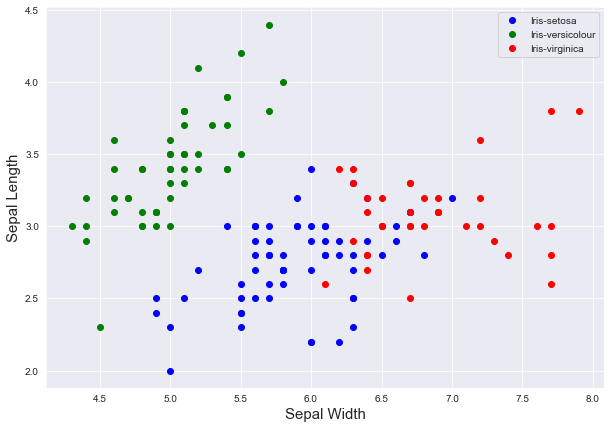

In [ ]:
# Let's trying Visualizing the Sepal Width against Sepal Length

plt.figure(figsize=(10,7))
plt.plot(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], 'bo', label = 'Iris-setosa')
plt.plot(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], 'go', label = 'Iris-versicolour')
plt.plot(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], 'ro', label = 'Iris-virginica')
plt.xlabel('Sepal Width', fontsize=15)
plt.ylabel('Sepal Length', fontsize=15)
plt.legend()
plt.show()

### Plotting the Cluster Centroids

In [ ]:
centroids = km.cluster_centers_
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

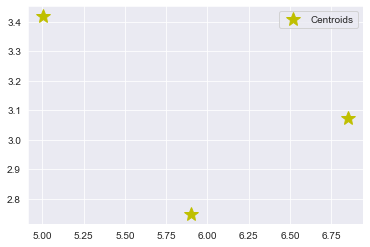

In [ ]:
plt.plot(centroids[:, 0], centroids[:, 1], 'y*', label='Centroids', markersize=15)
plt.legend()
plt.show()

### Plotting the clusters along with the centroids

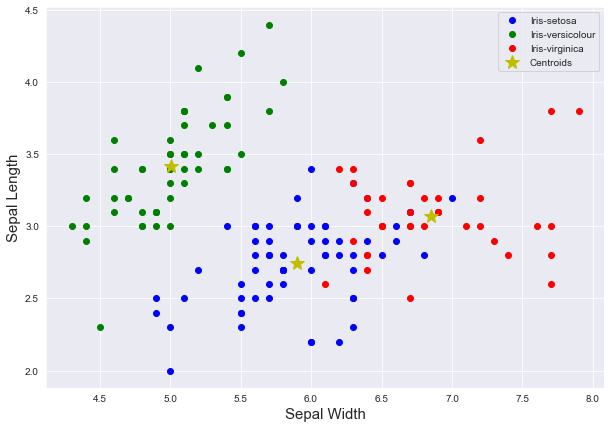

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], 'bo', label = 'Iris-setosa')
plt.plot(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], 'go', label = 'Iris-versicolour')
plt.plot(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], 'ro', label = 'Iris-virginica')
plt.plot(centroids[:, 0], centroids[:, 1], 'y*', label='Centroids', markersize=15)
plt.xlabel('Sepal Width', fontsize=15)
plt.ylabel('Sepal Length', fontsize=15)
plt.legend()
plt.show()

### PetalLength vs PetalWidth

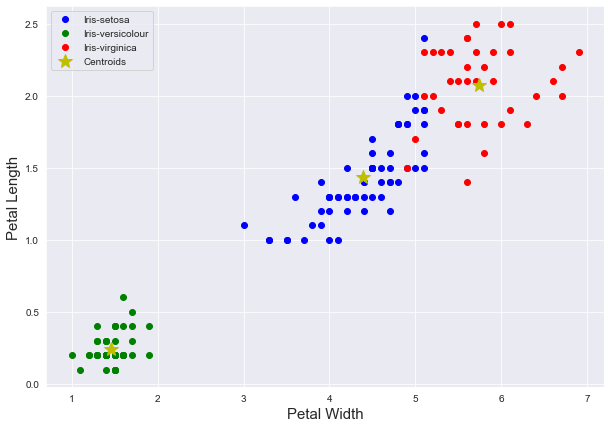

In [ ]:
# Let's try visulaizing the Petal Width against Petal Length

plt.figure(figsize=(10,7))
plt.plot(df[y_kmeans == 0, 2], df[y_kmeans == 0, 3], 'bo', label = 'Iris-setosa')
plt.plot(df[y_kmeans == 1, 2], df[y_kmeans == 1, 3], 'go', label = 'Iris-versicolour')
plt.plot(df[y_kmeans == 2, 2], df[y_kmeans == 2, 3], 'ro', label = 'Iris-virginica')
plt.plot(centroids[:, 2], centroids[:, 3], 'y*', label='Centroids', markersize=15)
plt.xlabel('Petal Width', fontsize=15)
plt.ylabel('Petal Length', fontsize=15)
plt.legend()
plt.show()

## Conclusion
From the above plots, we can conclude that the optimum number of clusters are **'3'**.